[1] Code từ lấy dữ liệu và train model của scikit learn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

[2] Code capture ảnh bằng webcam trên google colab: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=lIYdn1woOS1n

In [195]:
#[1]
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

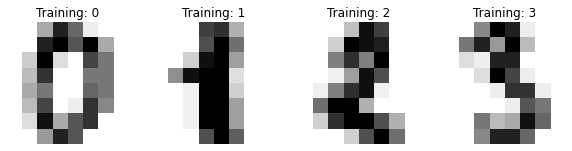

In [196]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

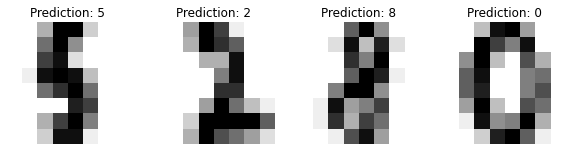

In [197]:
#[1]
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.1, shuffle=False)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [198]:
#[1]
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17
           3       0.93      0.78      0.85        18
           4       1.00      0.95      0.97        20
           5       0.86      1.00      0.92        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.85      1.00      0.92        17
           9       1.00      0.89      0.94        18

    accuracy                           0.96       180
   macro avg       0.96      0.96      0.96       180
weighted a

In [212]:
#[2]
#Hàm để chụp hình bằng webcam
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
#[2]
#Chạy cell này để chụp hình bằng webcam trên google colab
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [202]:
#Clone repo về để lấy ảnh đã chụp
!git clone https://github.com/phandaiduonghcb/CS114.L21

fatal: destination path 'CS114.L21' already exists and is not an empty directory.


(480, 640)


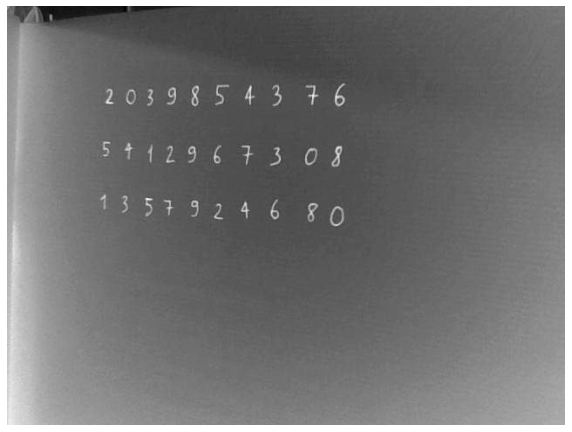

In [203]:
#Ảnh đã chụp được lưu ở '/content/CS114.L21/BTQT/Hand-written digits/photo.jpg'
#Chuyển ảnh RGB thành grayscale
import numpy as np
from PIL import Image

im = np.array(Image.open('/content/CS114.L21/BTQT/Hand-written digits/photo.jpg').convert('L')) #you can pass multiple arguments in single line

gr_im= Image.fromarray(im).save('converted.jpg')

image = Image.open('converted.jpg')
data = np.asarray(image)
print(data.shape)

#Show ảnh
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axes.set_axis_off()
axes.imshow(data,cmap=plt.cm.gray_r)

In [204]:
#Các số đúng
true_y = [2,0,3,9,8,5,4,3,7,6,5,4,1,2,9,6,7,3,0,8,1,3,5,7,9,2,4,6,8,0]

In [205]:
#Crop từng số trong ảnh converted
#Dùng trang https://www.iloveimg.com/crop-image để tìm vị trí ảnh muốn crop
from PIL import Image
data = []
im = Image.open("converted.jpg")
  
# Setting the points for cropped image
left = 107
top = 93
right = left+23
bottom = top+23
  
# Cropped image of above dimension
im2 = im.crop((left, top, right, bottom))
im2 = im2.resize((8,8))
data.append(np.asarray(im2).reshape(1,64))

left = 155
top = 92
right = left+23
bottom = top+23
  
# Cropped image of above dimension
# (It will not change orginal image)
im3 = im.crop((left, top, right, bottom))
im3 = im3.resize((8,8))
data.append(np.asarray(im3).reshape(1,64))

left = 131
top = 93
right = left+23
bottom = top+23
  
# Cropped image of above dimension
# (It will not change orginal image)
im5 = im.crop((left, top, right, bottom))
im5 = im5.resize((8,8))
data.append(np.asarray(im5).reshape(1,64))

left = 177
top = 91
right = left+23
bottom = top+23
  
# Cropped image of above dimension
# (It will not change orginal image)
im9 = im.crop((left, top, right, bottom))
im9 = im9.resize((8,8))
data.append(np.asarray(im9).reshape(1,64))

left = 205
top = 91
right = left+23
bottom = top+23
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 232
top = 88
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 265
top = 88
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 297
top = 89
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 338
top = 88
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 368
top = 89
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 101
top = 150
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 126
top = 152
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 151
top = 155
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 175
top = 156
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 199
top = 156
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 229
top = 156
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 262
top = 156
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 295
top = 159
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 336
top = 160
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 366
top = 159
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 99
top = 210
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 123
top = 213
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 149
top = 216
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 172
top = 217
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 201
top = 218
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 228
top = 221
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 261
top = 220
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 294
top = 220
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 337
top = 223
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))

left = 365
top = 227
right = left+27
bottom = top+27
  
# Cropped image of above dimension
# (It will not change orginal image)
im4 = im.crop((left, top, right, bottom))
im4 = im4.resize((8,8))
data.append(np.asarray(im4).reshape(1,64))



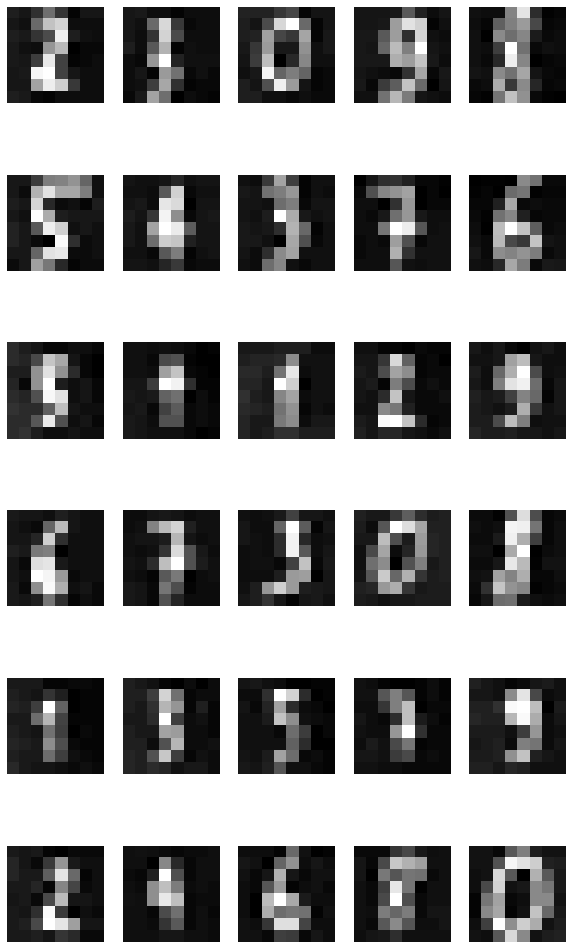

In [206]:
#Hiển thị 30 ảnh crop được
_, axes = plt.subplots(nrows=6, ncols=5, figsize=(10, 18))
s=0
e=5
for ax in axes:
  for x, image in zip(ax, data[s:e]):
    x.set_axis_off()
    image = image.reshape(8, 8)
    x.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  s+=5
  e+=5

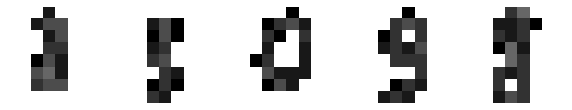

In [208]:
#Làm cho hình giống với các hình đã train hơn, chữ số màu đen, nền màu trắng
temp = []
row = 0

for i in range(len(data)):
  x=data[i]

  l = [[]]
  for i in range(len(x)):
    for j in range(len(x[i])):
      if x[i][j]>x[i].mean(): #Nếu giá trị phần tử lớn hơn trung bình của cả mảng
        l[0].append(0.) #cho giá trị phần tử đó bằng 0. -> Cho nền đen thành trắng
      else:
        l[0].append(x[i][j]//(x.mean()//10))
        #Giá trị toàn 100 trở lên trong khi các ảnh train thì trong khoảng cỡ 0->20
        #nên giảm xuống bớt

  temp.append(np.array(l)) #List các ảnh được cắt sau khi đổi nền
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image in zip(axes, temp[:5]):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [209]:
#Dùng model để dự đoán
n = len(temp)
temp = np.array(temp).reshape((n,-1))
predicted = clf.predict(temp)


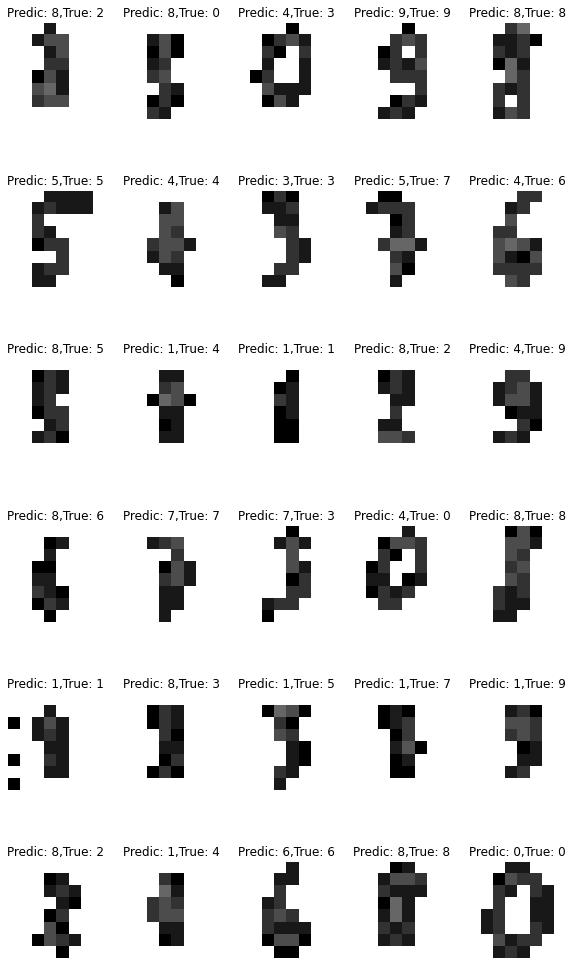

In [210]:
#Hiển thị ảnh và dự đoán
_, axes = plt.subplots(nrows=6, ncols=5, figsize=(10, 18))
s=0
e=5
for ax in axes:
  for x, image, prediction,y in zip(ax, temp[s:e], predicted[s:e],true_y[s:e]):
      x.set_axis_off()
      image = image.reshape(8, 8)
      x.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      x.set_title(f'Predic: {prediction},True: {y}') # True: 2 3 5 9 4
  s+=5
  e+=5

In [211]:
#Số chữ số dự đoán đúng
d =0
for i in range(len(true_y)):
  if true_y[i]==predicted[i]:
    d+=1
print(d)

12


PHÂN TÍCH:


*   Kết quả thực tế với webcam của laptop và giấy viết tay không tốt vì dự đoán sai nhiều (đúng 12/30, 40%)
* Lý do kết quả không tốt là do dữ liệu đưa vào model chưa được xử lí tốt, một số số sau khi xử lí nhìn bằng mắt thường cũng không thể hiểu được (số thứ 1, 7, 12, 13, 16, 18, 20, 21, 22, 23, 24, 26, 27) do resize và lúc đổi màu cho số, cũng có thể là do lượng data dùng để train cho model vẫn chưa đủ nhiều. Nếu tự viết tay rồi làm các bước như trên rồi gán nhãn, train cho model thật nhiều thì kết quả sẽ tốt hơn
* Muốn dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà thì cần phải xử lí dữ liệu đầu vào cho khớp với các ảnh được train (cần có phương pháp crop số ra từ hình chụp, resize, chuyển thành grayscale,... hiệu quả) và đưa thêm nhiều dữ liệu để train model hơn.



